PROBLEM 1

1. I ran extractFrames.sh to use ffmpeg on my videos and extract 
all the frames. Mkdir wasn't working for me in the script for some 
reason so instead I removed that line, made the directories manually, 
and then ran it normally.

2. Output of checkData.py:

Running data check script on adonisyee.zip

Checking that the compressed file has .zip extension......

Passed!

Unzipping adonisyee.zip

Archive:  adonisyee.zip

   creating: adonisyee/
   
  inflating: adonisyee/.DS_Store     
  
   creating: adonisyee/labels/
   
  inflating: adonisyee/labels/lunge_adonisyee.json 
  
replace __MACOSX/adonisyee/labels/._lunge_adonisyee.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y

  inflating: __MACOSX/adonisyee/labels/._lunge_adonisyee.json  
  
  inflating: adonisyee/labels/.DS_Store  
  
  inflating: adonisyee/labels/squat_adonisyee.json  
  
replace __MACOSX/adonisyee/labels/._squat_adonisyee.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A

  inflating: __MACOSX/adonisyee/labels/._squat_adonisyee.json  
  
  inflating: adonisyee/labels/inline_adonisyee.json  
  
  inflating: __MACOSX/adonisyee/labels/._inline_adonisyee.json  
  
  inflating: adonisyee/labels/hamstrings_adonisyee.json  
  
  inflating: __MACOSX/adonisyee/labels/._hamstrings_adonisyee.json
  
  inflating: adonisyee/labels/stretch_adonisyee.json  
  
  inflating: __MACOSX/adonisyee/labels/._stretch_adonisyee.json 
  
  inflating: adonisyee/labels/reach_adonisyee.json  
  
  inflating: __MACOSX/adonisyee/labels/._reach_adonisyee.json 
  
  inflating: adonisyee/labels/deadbug_adonisyee.json  
  inflating: __MACOSX/adonisyee/labels/._deadbug_adonisyee.json
  
  inflating: adonisyee/labels/export-2019-03-31T02_12_19.175Z.json
  
  inflating: __MACOSX/adonisyee/labels/._export-2019-03-31T02_12_19.175Z.json
  
  inflating: adonisyee/labels/pushup_adonisyee.json
  
  inflating: __MACOSX/adonisyee/labels/._pushup_adonisyee.json
  
   creating: adonisyee/key_frames/
   
  inflating: adonisyee/key_frames/hamstring_l.jpg
  
  inflating: adonisyee/key_frames/.DS_Store
  
  inflating: adonisyee/key_frames/pushup.jpg
  
  inflating: __MACOSX/adonisyee/key_frames/._pushup.jpg
  
  inflating: adonisyee/key_frames/stretch_r.jpg
  
  inflating: adonisyee/key_frames/lunge_l.jpg
  
  inflating: adonisyee/key_frames/deadbug_r.jpg
  
  inflating: adonisyee/key_frames/reach.jpg
  
  inflating: adonisyee/key_frames/inline_r.jpg
  
  inflating: adonisyee/key_frames/stretch_l.jpg
  
  inflating: adonisyee/key_frames/lunge_r.jpg
  
  inflating: adonisyee/key_frames/deadbug_l.jpg
  
  inflating: adonisyee/key_frames/inline_l.jpg
  
  inflating: adonisyee/key_frames/hamstring_r.jpg
  
  inflating: adonisyee/key_frames/squat.jpg
  
Checking directory structure of unpacked folder......

Passed!

Checking key frames......

Passed!

Checking keypoints label file......

Passed!

Checking video label files......

Checking label file adonisyee/labels/lunge_adonisyee.json

Checking label file adonisyee/labels/squat_adonisyee.json

Checking label file adonisyee/labels/inline_adonisyee.json

Checking label file adonisyee/labels/hamstrings_adonisyee.json

Checking label file adonisyee/labels/stretch_adonisyee.json

Checking label file adonisyee/labels/reach_adonisyee.json

Checking label file adonisyee/labels/deadbug_adonisyee.json

Checking label file adonisyee/labels/pushup_adonisyee.json

Passed!


\pagebreak

PROBLEM 2

2.1

In [1327]:
"""
This is the starter code and some suggested architecture we 
provide you with. But feel free to do any modifications as you
wish or just completely ignore all of them and have your own 
implementations.
"""
from collections import Counter

import numpy as np
from numpy import genfromtxt
import scipy.io
from scipy import stats

import random


class DecisionTree():

    def __init__(self, X, y, depth, nsize, features):
        """
        TODO: initialization of a decision tree
        """
        self.X = X
        self.y = y
        self.features = features
        self.split_rule = self.segmenter(self.X, self.y)
        self.depth = depth
        self.nsize = nsize
        self.left = []
        self.right = []
        self.label = ''
        
    @staticmethod
    def entropy(y):
        """
        TODO: implement a method that calculates the entropy given all the labels
        """
        return scipy.stats.entropy(np.array(list(Counter(y).values())) / len(y),
                                   base=2)

    @staticmethod
    def information_gain(X, y, thresh):
        """
        TODO: implement a method that calculates information 
        gain given a vector of features
        and a split threshold
        """
        H = DecisionTree.entropy(y)
        meet_thresh = X < thresh
        S_l = y[meet_thresh]
        S_r = y[~meet_thresh]
        H_Sl = len(S_l)*DecisionTree.entropy(S_l)
        H_Sr = len(S_r)*DecisionTree.entropy(S_r)
        H_after = (H_Sl + H_Sr)/len(y)
        return H - H_after

    @staticmethod
    def gini_impurity(y):
        """
        TODO: implement a method that calculates the gini 
        impurity given all the labels
        """
        probs = np.array(list(Counter(y).values()))/len(y)
        return np.sum(probs * (1-probs))

    @staticmethod
    def gini_purification(X, y, thresh):
        """
        TODO: implement a method that calculates reduction in 
        impurity gain given a vector of features
        and a split threshold
        """
        g = DecisionTree.gini_impurity(y)
        meet_thresh = X < thresh
        S_l = y[meet_thresh]
        S_r = y[~meet_thresh]
        g_Sl = len(S_l)*DecisionTree.gini_impurity(S_l)
        g_Sr = len(S_r)*DecisionTree.gini_impurity(S_r)
        g_after = (g_Sl + g_Sr)/len(y)
        return g - g_after

    def split(self, X, y, idx, thresh):
        """
        TODO: implement a method that returns a split of the 
        dataset given an index of the feature and
        a threshold for it
        """
        meet_thresh = X[:, idx] < thresh
        S_l_X = X[meet_thresh]
        S_r_X = X[~meet_thresh]
        S_l_y = y[meet_thresh]
        S_r_y = y[~meet_thresh]
        return S_l_X, S_r_X, S_l_y, S_r_y
    
    def segmenter(self, X, y):
        """
        TODO: compute entropy gain for all single-dimension splits,
        return the feature and the threshold for the split that
        has maximum gain
        """
        feat_idxs = np.arange(X.shape[1])
        unique_features = [list(Counter(X[:, i]).keys()) for i in feat_idxs]
        max_gain = 0
        feature = -float('inf')
        threshold = -float('inf')
        for i in feat_idxs:
            for val in unique_features[i]:
                #gain = DecisionTree.information_gain(X[:, i], y, val)
                gain = DecisionTree.gini_purification(X[:, i], y, val)
                if gain >= max_gain:
                    max_gain = gain
                    feature = i
                    threshold = val
        return feature, threshold
    
    def fit(self, X, y):
        """
        TODO: fit the model to a training set. Think about what would be 
        your stopping criteria
        """
        if (len(y)<=self.nsize) or (self.depth==0):
            self.label = stats.mode(y)[0][0]
            return
        if max(list(Counter(y).values()))/len(y)<=.05:
            self.label = stats.mode(y)[0][0]
            return
        X_l, X_r, y_l, y_r = self.split(X, y, self.split_rule[0], 
                                        self.split_rule[1])
        if (len(y_l) <= self.nsize) or (len(y_r) <= self.nsize):
            self.label = stats.mode(y)[0][0]
            return
        self.left = DecisionTree(X_l, y_l, self.depth-1, self.nsize, 
                                 self.features)
        self.right = DecisionTree(X_r, y_r, self.depth-1, self.nsize, 
                                  self.features)   
        self.left.fit(X_l, y_l)
        self.right.fit(X_r, y_r)
        
    def predict_row(self, row):
            if self.label != '':
                return self.label
            if row[self.split_rule[0]] < self.split_rule[1]:
                next_level = self.left
            else:
                next_level = self.right
            return next_level.predict_row(row)

    def predict(self, X):
        """
        TODO: predict the labels for input data 
        """ 
        return np.array([self.predict_row(row) for row in X])

#code to print tree adapted from: 
#https://stackoverflow.com/questions/20242479/printing-a-tree-data-structure-in-python
    def __repr__(self, level=0):
        """
        TODO: one way to visualize the decision tree is 
        to write out a __repr__ method that returns the string 
        representation of a tree. Think about how to visualize 
        a tree structure. You might have seen this before in CS61A.
        """
        word = self.features[self.split_rule[0]]
        threshold = self.split_rule[1]
        ret = "\t"*level+repr(word+' '+str(threshold))+"\n"
        if self.label != '':
            ret += "\t"*(level+2)+repr(self.label)+"\n"
        if self.left != []:
            ret += self.left.__repr__(level+1)
        if self.right != []:
            ret += self.right.__repr__(level+1)
        return ret

\pagebreak

2.2

In [667]:
import pandas as pd

class RandomForest():
    def __init__(self, X, y, sample_size, depth, nsize, features):
        """
        TODO: initialization of a random forest
        """
        np.random.seed(42)
        self.X = X
        self.y = y
        self.depth = depth
        self.nsize = nsize
        self.features = features
        self.m_features = int(np.sqrt(self.X.shape[1]))
        self.sample_size = sample_size
        self.trees = [self.make_tree() for i in np.arange(10)]
    
    def make_tree(self):
        indices = np.random.permutation(len(self.y))[:self.sample_size]
        feat_indices = np.random.permutation(self.X.shape[1])[:self.m_features]
        X_samp = self.X[:, feat_indices]
        return DecisionTree(X_samp[indices], self.y[indices], self.depth, 
                            self.nsize, self.features[feat_indices])

    def fit(self, X, y):
        """
        TODO: fit the model to a training set.
        """
        for t in self.trees:
            t.fit(X, y)
        return
    
    def predict(self, X):
        """
        TODO: predict the labels for input data 
        """
        return stats.mode([t.predict(X) for t in self.trees], axis=0)

\pagebreak

2.3

1. How did you deal with categorical features and missing values? 
I dealt with categorical features by using one-hot encoding. I dealt
with missing values by inferring them using either a mean or mode of the
feature being dealt with after filtering the data based on other features
that were similar to the one with the missing value. For example, I used
the mean age of people in first class to infer the age of someone in first
class with a missing age.

2. What was your stopping criterion?
My stopping criterion were if I reached a certain depth level found with
validation testing, if 95% of the points in the node had the same label,
if the size of a node got to be smaller than a number found with 
validation testing, or if splitting would result in a node smaller
than that determined number.

3. How did you implement random forests?
I implemented random forests by creating multiple decision trees, 
picking sqrt(len(features)) randomly for each tree and using a 
sample of data points (size picked with validation) for each tree. 
Then I trained each tree and made a prediction for each, using the 
mode of predictions for each point as the final prediction.

4. Did you do anything special to speed up training?
I made sure to use Counter wherever I could and use masks
for comparisons wherever I could in my Decision Tree.
Everything ran in no more than a few seconds except
for random forests for spam, which still ran in about
30 seconds or so.

5. Anything else cool you implemented?
For titanic, I utilized the cabin feature despite so many
nans by filtering the cabins down to the deck letter and
assigning deck letters with probabilities depending on 
which class the person was in. I googled deck levels on
the titanic to help figure out which deck levels to assign.

\pagebreak

2.4

In [663]:
def train_val_split(data, split_val):
    np.random.seed(42)
    np.random.shuffle(data)
    train = data[:split_val]
    validation = data[split_val:]
    return train, validation

In [1233]:
def load_and_clean_titanic(path, istest):
    # Load titanic data       
    data = pd.read_csv(path)

    if not istest:
        #drop missing label rows
        data = data.drop(data[pd.isnull(data['survived'])].index)

    #make sex numerical
    data[['female', 'male']] = pd.get_dummies(data['sex'])
    data['sex'] = data['male']
    data = data.drop(['male', 'female'], axis=1)

    #infer missing age using mean age of people in same pclass
    mean_3 = np.round(data[data['pclass'] == 3.0]['age'].mean())
    mean_2 = np.round(data[data['pclass'] == 2.0]['age'].mean())
    mean_1 = np.round(data[data['pclass'] == 1.0]['age'].mean())
    age = data.apply(lambda row: mean_3 if np.isnan(row['age']) 
                      and row['pclass'] == 3.0 else row['age'], axis=1)
    data['age'] = age
    age = data.apply(lambda row: mean_2 if np.isnan(row['age'])
                      and row['pclass'] == 2.0 else row['age'], axis=1)
    data['age'] = age
    age = data.apply(lambda row: mean_1 if np.isnan(row['age']) 
                      and row['pclass'] == 1.0 else row['age'], axis=1)
    data['age'] = age

    #infer missing fare cost using mean cost of tickets with same pclass
    mean_fare_3 = np.round(data[data['pclass'] == 3.0]['fare'].mean(), 4)
    mean_fare_2 = np.round(data[data['pclass'] == 2.0]['fare'].mean(), 4)
    mean_fare_1 = np.round(data[data['pclass'] == 1.0]['fare'].mean(), 4)

    fare = data.apply(lambda row: mean_fare_3 if np.isnan(row['fare']) 
                       and row['pclass'] == 3.0 else row['fare'], axis=1)
    data['fare'] = fare
    fare = data.apply(lambda row: mean_fare_2 if np.isnan(row['fare']) 
                       and row['pclass'] == 2.0 else row['fare'], axis=1)
    data['fare'] = fare
    fare = data.apply(lambda row: mean_fare_1 if np.isnan(row['fare']) 
                       and row['pclass'] == 1.0 else row['fare'], axis=1)
    data['fare'] = fare
    
    #ticket field is all different, drop it
    data = data.drop('ticket', axis=1)
    
    #infer cabin values based on pclass, then make numerical
    np.random.seed(42)
    data['cab'] = data.apply(lambda row: np.random.choice(['G', 'F'], 
                                                          p=[.7, .3]) 
                             if pd.isnull(row['cabin']) 
                             and row['pclass']==3.0 
                             else row['cabin'], axis=1)
    data['cab'] = data.apply(lambda row: np.random.choice(['D', 'E', 'F'], 
                                                          p=[.2, .6, .2]) 
                               if pd.isnull(row['cab']) 
                               and row['pclass']==2.0 
                             else row['cab'], axis=1)
    data['cab'] = data.apply(lambda row: np.random.choice(['A', 
                                                           'B', 
                                                           'C', 
                                                           'D'], 
                                                          p=[.3,.3,.3,.1]) 
                             if pd.isnull(row['cab']) 
                             and row['pclass']==1.0 
                             else row['cab'], axis=1)
    
    data['cab'] = data.apply(lambda row: 'G' if 'G' in row['cab'] 
                             else row['cab'], axis=1)
    data['cab'] = data.apply(lambda row: 'F' if 'F' in row['cab'] 
                             else row['cab'], axis=1)
    data['cab'] = data.apply(lambda row: 'E' if 'E' in row['cab'] 
                             else row['cab'], axis=1)
    data['cab'] = data.apply(lambda row: 'D' if 'D' in row['cab'] 
                             else row['cab'], axis=1)
    data['cab'] = data.apply(lambda row: 'C' if 'C' in row['cab'] 
                             else row['cab'], axis=1)
    data['cab'] = data.apply(lambda row: 'B' if 'B' in row['cab'] 
                             else row['cab'], axis=1)
    data['cab'] = data.apply(lambda row: 'A' if 'A' in row['cab'] 
                             else row['cab'], axis=1)
    data['cabin'] = data['cab']
    data = data.drop('cab', axis=1)
    
    if not istest:
        data[['cabin A', 'cabin B', 
              'cabin C', 'cabin D', 
              'cabin E', 'cabin F', 
              'cabin G']] = pd.get_dummies(data['cabin']).drop('T', axis=1)
    else:
        data[['cabin A', 'cabin B', 'cabin C', 'cabin D', 
              'cabin E', 'cabin F', 
              'cabin G']] = pd.get_dummies(data['cabin'])
    data = data.drop('cabin', axis=1)
    
    #infer missing embarked values with mode of feature, 
    #then make numerical
    data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
    data = data.drop('embarked', axis=1)
    return data

In [1234]:
def train_data(dataset, depth, nsize, sample_size=0, test=False): 
    if dataset == "titanic":
        # Load titanic data       
        path_train = 'datasets/titanic/titanic_training.csv'
        path_test = 'datasets/titanic/titanic_testing_data.csv'
        data = load_and_clean_titanic(path_train, False)
        Z = load_and_clean_titanic(path_test, True).values
        y = np.array(data['survived'])
        X = data.drop('survived', axis=1)
        class_names = ["Died", "Survived"]
        features = np.array(X.columns)
        X = X.values
        
        if not test:
            X_train, X_val = train_val_split(X, len(X) - 200)
            y_train, y_val = train_val_split(y, len(y) - 200)

            if sample_size == 0:
                model = DecisionTree(X_train, y_train, depth, 
                                     nsize, features)
            else:
                model = RandomForest(X_train, y_train, sample_size, 
                                     depth, nsize, features)
        else:
            model = DecisionTree(X, y, depth, nsize, features)


        # TODO: preprocess titanic dataset
        # Notes: 
        # 1. Some data points are missing their labels
        # 2. Some features are not numerical but categorical
        # 3. Some values are missing for some features

    elif dataset == "spam":
        features = np.array([
            "pain", "private", "bank", "money", "drug", "spam", 
            "prescription", "creative", "height", "featured", 
            "differ", "width", "other", "energy", "business", 
            "message", "volumes", "revision", "path", "meter", 
            "memo", "planning", "pleased", "record", "out",
            "semicolon", "dollar", "sharp", "exclamation", 
            "parenthesis", "square_bracket", "ampersand", 
            "shipping", "price", "pills", "windows", "online", 
            'email'
        ])
        assert len(features) == 38

        # Load spam data
        path_train = 'datasets/spam-dataset/spam_data.mat'
        data = scipy.io.loadmat(path_train)
        X = data['training_data']
        y = np.squeeze(data['training_labels'])
        Z = data['test_data']
        class_names = ["Ham", "Spam"]
        
        if not test:
            X_train, X_val = train_val_split(X, len(X) - 1000)
            y_train, y_val = train_val_split(y, len(y) - 1000)

            if sample_size == 0:
                model = DecisionTree(X_train, y_train, depth, 
                                     nsize, features)
            else:
                model = RandomForest(X_train, y_train, sample_size, 
                                     depth, nsize, features)
        else:
            model = RandomForest(X, y, sample_size, depth, 
                                 nsize, features)

    else:
        raise NotImplementedError("Dataset %s not handled" % dataset)

    """
    TODO: train decision tree/random forest on different datasets and 
    perform the tasks in the problem
    """
    if not test:
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)
        train_acc = (train_pred==y_train).sum()/len(y_train)
        val_acc = (val_pred==y_val).sum()/len(y_val)
        return train_acc, val_acc, model
    else:
        model.fit(X, y)
        test_pred = model.predict(Z)
        return test_pred

In [1251]:
#spam decision tree testing
dataset = "spam"
spam_train_acc, spam_val_acc, spam_tree = train_data(dataset,15,1,0,False)
print(spam_train_acc, spam_val_acc)

spam_train_acc2, spam_val_acc2, spam_tree2 = train_data(dataset,10,1,0,False)
print(spam_train_acc2, spam_val_acc2)

spam_train_acc3, spam_val_acc3, spam_tree3 = train_data(dataset,20,1,0,False)
print(spam_train_acc3, spam_val_acc3)

spam_train_acc4, spam_val_acc4, spam_tree4 = train_data(dataset,20,15,0,False)
print(spam_train_acc4, spam_val_acc4)

spam_train_acc5, spam_val_acc5, spam_tree5 = train_data(dataset,30,1,0,False)
print(spam_train_acc5, spam_val_acc5)

0.861457334611697 0.86
0.8434803451581975 0.848
0.8688878235858102 0.861
0.8267018216682647 0.825
0.8722435282837967 0.859


In [1237]:
#spam random forest testing
spam_train_acc,spam_val_acc,spam_tree = train_data(dataset,30,1,4171,False)
print(spam_train_acc, spam_val_acc)

0.8734419942473634 0.858


In [784]:
spam_train_acc2,spam_val_acc2,spam_tree2 = train_data(dataset,30,1,3000,False)
print(spam_train_acc2, spam_val_acc2)

0.8734419942473634 0.858


In [785]:
spam_train_acc3,spam_val_acc3,spam_tree3 = train_data(dataset,30,1,2000,False)
print(spam_train_acc3, spam_val_acc3)

0.8729626078619367 0.858


In [786]:
spam_train_acc4,spam_val_acc4,spam_tree4 = train_data(dataset,30,1,500,False)
print(spam_train_acc4, spam_val_acc4)

0.8734419942473634 0.856


In [787]:
spam_train_acc4,spam_val_acc4,spam_tree4 = train_data(dataset,30,10,3000,False)
print(spam_train_acc4, spam_val_acc4)

0.8338926174496645 0.831


In [788]:
spam_train_acc3,spam_val_acc3,spam_tree3 = train_data(dataset,20,1,2000,False)
print(spam_train_acc3, spam_val_acc3)

0.8696069031639502 0.86


In [1204]:
#titanic decision tree testing
dataset = "titanic"
t_train_acc, t_val_acc, t_tree = train_data(dataset, 3, 1, 0, False)
print(t_train_acc, t_val_acc)
t_train_acc2, t_val_acc2, t_tree2 = train_data(dataset, 15, 1, 0, False)
print(t_train_acc2, t_val_acc2)
t_train_acc3, t_val_acc3, t_tree3 = train_data(dataset, 5, 1, 0, False)
print(t_train_acc3, t_val_acc3)
t_train_acc4, t_val_acc4, t_tree4 = train_data(dataset, 3, 10, 0, False)
print(t_train_acc4, t_val_acc4)
t_train_acc5, t_val_acc5, t_tree5 = train_data(dataset, 30, 1, 0, False)
print(t_train_acc5, t_val_acc5)

0.8147684605757196 0.835
0.886107634543179 0.78
0.8360450563204005 0.81
0.8072590738423029 0.81
0.886107634543179 0.78


In [1205]:
#titanic random forest testing
t_train_acc, t_val_acc, t_tree = train_data(dataset, 3, 1, 699, False)
print(t_train_acc, t_val_acc)

0.7972465581977471 0.755


In [1206]:
t_train_acc, t_val_acc, t_tree = train_data(dataset, 10, 1, 699, False)
print(t_train_acc, t_val_acc)

0.8710888610763454 0.8


In [1210]:
t_train_acc, t_val_acc, t_tree = train_data(dataset, 20, 1, 699, False)
print(t_train_acc, t_val_acc)

0.8748435544430538 0.8


In [1213]:
t_train_acc, t_val_acc, t_tree = train_data(dataset, 10, 10, 699, False)
print(t_train_acc, t_val_acc)

0.6332916145181476 0.535


In [1215]:
t_train_acc, t_val_acc, t_tree = train_data(dataset, 10, 1, 300, False)
print(t_train_acc, t_val_acc)

0.8660826032540676 0.805


In [1216]:
t_train_acc, t_val_acc, t_tree = train_data(dataset, 10, 1, 200, False)
print(t_train_acc, t_val_acc)

0.869837296620776 0.79


In [1221]:
t_train_acc, t_val_acc, t_tree = train_data(dataset, 10, 1, 350, False)
print(t_train_acc, t_val_acc)

0.869837296620776 0.79


In [1230]:
def results_to_csv(test, submission_name):
    test = test.astype(int)
    df = pd.DataFrame({'Category': test}, index=np.arange(len(test)))
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv(submission_name, index_label='Id')

In [1180]:
#kaggle submissions generation
spam_test_pred = train_data("spam", 20, 1, 2000, True)

In [1182]:
results_to_csv(spam_test_pred[0][0], 'submission.csv')

In [1225]:
titanic_test_pred = train_data("titanic", 3, 1, 0, True)

In [1231]:
results_to_csv(titanic_test_pred, 'titanic_submission.csv')

\pagebreak

Accuracies:

For the spam dataset, Decision Tree: 

Training accuracy = 0.8688878235858102

Validation accuracy = 0.861


For the spam dataset, Random Forest: 

Training accuracy = 0.8696069031639502

Validation accuracy = 0.86


For the titanic dataset, Decision Tree:

Training accuracy = 0.8147684605757196 

Validation accuracy = 0.835


For the titanic dataset, Random Forest:

Training accuracy = 0.8748435544430538 

Validation accuracy = 0.8


Kaggle Submissions:

username = ayee

submission accuracy, spam = 0.78030

submission accuracy, titanic = 0.84946

\pagebreak

2.5

For spam, I added features for 2 more words I thought were
common in spam. I also found the 5 most common words in 
spam, filtering out words I thought common in spam and ham
manually, and used those words as features. 

1. I added a feature for a word I thought was common in spam ("shipping") 
by using the same type of code that was used for the standard features in
featurize.py. Then, I found the 5 most common words in the spam files that
were 5 letters or longer while filtering out words I thought would be 
common in both spam and ham, and I used those words as features. All
these features were implemented in featurize.py.


2. 
Splits of a spam email:

(a) ("exclamation") >= 1

(b) ("ampersand") < 1

(c) ("meter") < 1

(d) ("volumes") < 1

(e) ("money") < 1

(f) ("dollar") < 2

(g) ("message") < 1

(h) ("prescription") < 1

(i) ("semicolon") >= 1

(j) ("other") < 1

(k) ("parenthesis") < 1

(l) ("exclamation") < 2

(m) Therefore the email was classified as spam

Splits of a ham email:

(a) ('exclamation') < 1

(b) ('meter') < 1

(c) ('online') < 1

(d) ('parenthesis') >= 1

(e) ('private') < 1

(f) ('differ') < 1

(g) ('pills') < 1

(h) ('dollar') < 2

(i) ('windows') < 2

(j) ('money') < 1

(k) Therefore the message was classified as ham

In [1261]:
#I inserted print statements into the tree to find 
#these splits, they are no longer there
spam_tree3.predict([X[0], X[len(y)-1]])

28 1.0
>=
31 1.0
<
19 1.0
<
16 1.0
<
3 1.0
<
26 2.0
<
15 1.0
<
6 1.0
<
25 1.0
>=
12 1.0
<
29 1.0
<
28 2.0
<
1
28 1.0
<
19 1.0
<
36 1.0
<
29 1.0
>=
1 1.0
<
10 1.0
<
34 1.0
<
26 2.0
<
35 2.0
<
3 1.0
<
0


array([1, 0])

In [1300]:
def train_data_val(dataset, depth, nsize): 
    if dataset == "spam":
        features = np.array([
            "pain", "private", "bank", "money", "drug", "spam", 
            "prescription", "creative", "height", "featured", 
            "differ", "width", "other", "energy", "business", 
            "message", "volumes", "revision", "path", "meter", 
            "memo", "planning", "pleased", "record", "out",
            "semicolon", "dollar", "sharp", "exclamation", 
            "parenthesis", "square_bracket", "ampersand", 
            "shipping", "price", "pills", "windows", "online", 
            'email'
        ])
        assert len(features) == 38

        # Load spam data
        path_train = 'datasets/spam-dataset/spam_data.mat'
        data = scipy.io.loadmat(path_train)
        X = data['training_data']
        y = np.squeeze(data['training_labels'])
        class_names = ["Ham", "Spam"]

        X_train, X_val = train_val_split(X, int(np.round(len(X)*.8)))
        y_train, y_val = train_val_split(y, int(np.round(len(y)*.8)))
            
        model = DecisionTree(X_train, y_train, depth, 
                                     nsize, features)  

    else:
        raise NotImplementedError("Dataset %s not handled" % dataset)

    """
    TODO: train decision tree/random forest on different datasets and 
    perform the tasks in the problem
    """
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    val_acc = (val_pred==y_val).sum()/len(y_val)
    return val_acc

\pagebreak

In [1301]:
val_accuracies = np.array([])
for i in np.arange(40):
    val_acc = train_data_val('spam', i+1, 1)
    val_accuracies = np.append(val_accuracies, val_acc)

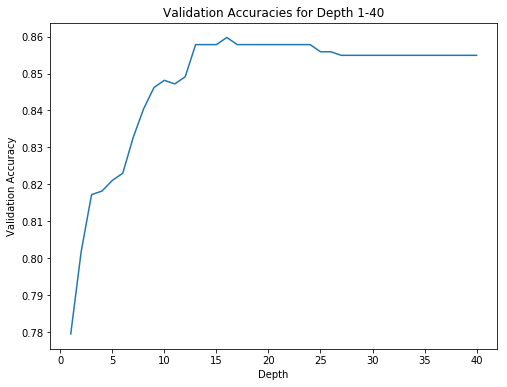

In [1310]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(np.arange(1,41), val_accuracies)
plt.xlabel('Depth')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracies for Depth 1-40');

3. The depth with the highest validation accuracy was 15. We see that as depth
increases the accuracy increases as the model gets better, but after depth 15
the model begins to overfit and the validation accuracy decreases.

In [1313]:
np.where(val_accuracies==max(val_accuracies))

(array([15]),)

\pagebreak

In [1328]:
dataset = "titanic"
t_train_acc, t_val_acc, t_tree = train_data(dataset, 3, 1, 0, False)
t_tree

'sex 1.0'
	'pclass 3.0'
		'fare 26.25'
			'age 60.0'
					1.0
			'age 3.0'
					1.0
		'fare 23.45'
			'age 26.0'
					1.0
			'age 10.0'
					0.0
	'age 11.5'
		'sibsp 4.0'
			'fare 15.9'
					1.0
			'cabin G 1.0'
					0.0
		'pclass 2.0'
			'age 55.0'
					0.0
			'age 33.0'
					0.0

For the leaf nodes, 0 = Died and 1 = Survived. I did not feel like modifying everything
to keep track of the class names.